In [1]:
import seaborn as sns
import pandas as pd
import json
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
import statsmodels.api as sm
import warnings

/Users/stevengu0/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = json.load(open('device-pma-0001-of-0001.json'))
df_pma = pd.DataFrame(data['results'])
df_pma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41599 entries, 0 to 41598
Data columns (total 24 columns):
applicant                         41599 non-null object
supplement_number                 41599 non-null object
supplement_type                   41599 non-null object
decision_date                     41599 non-null object
product_code                      41599 non-null object
city                              41599 non-null object
zip                               41599 non-null object
pma_number                        41599 non-null object
generic_name                      41599 non-null object
openfda                           41599 non-null object
state                             41599 non-null object
date_received                     41599 non-null object
trade_name                        41599 non-null object
supplement_reason                 41599 non-null object
advisory_committee_description    41599 non-null object
zip_ext                           41599 non-null ob

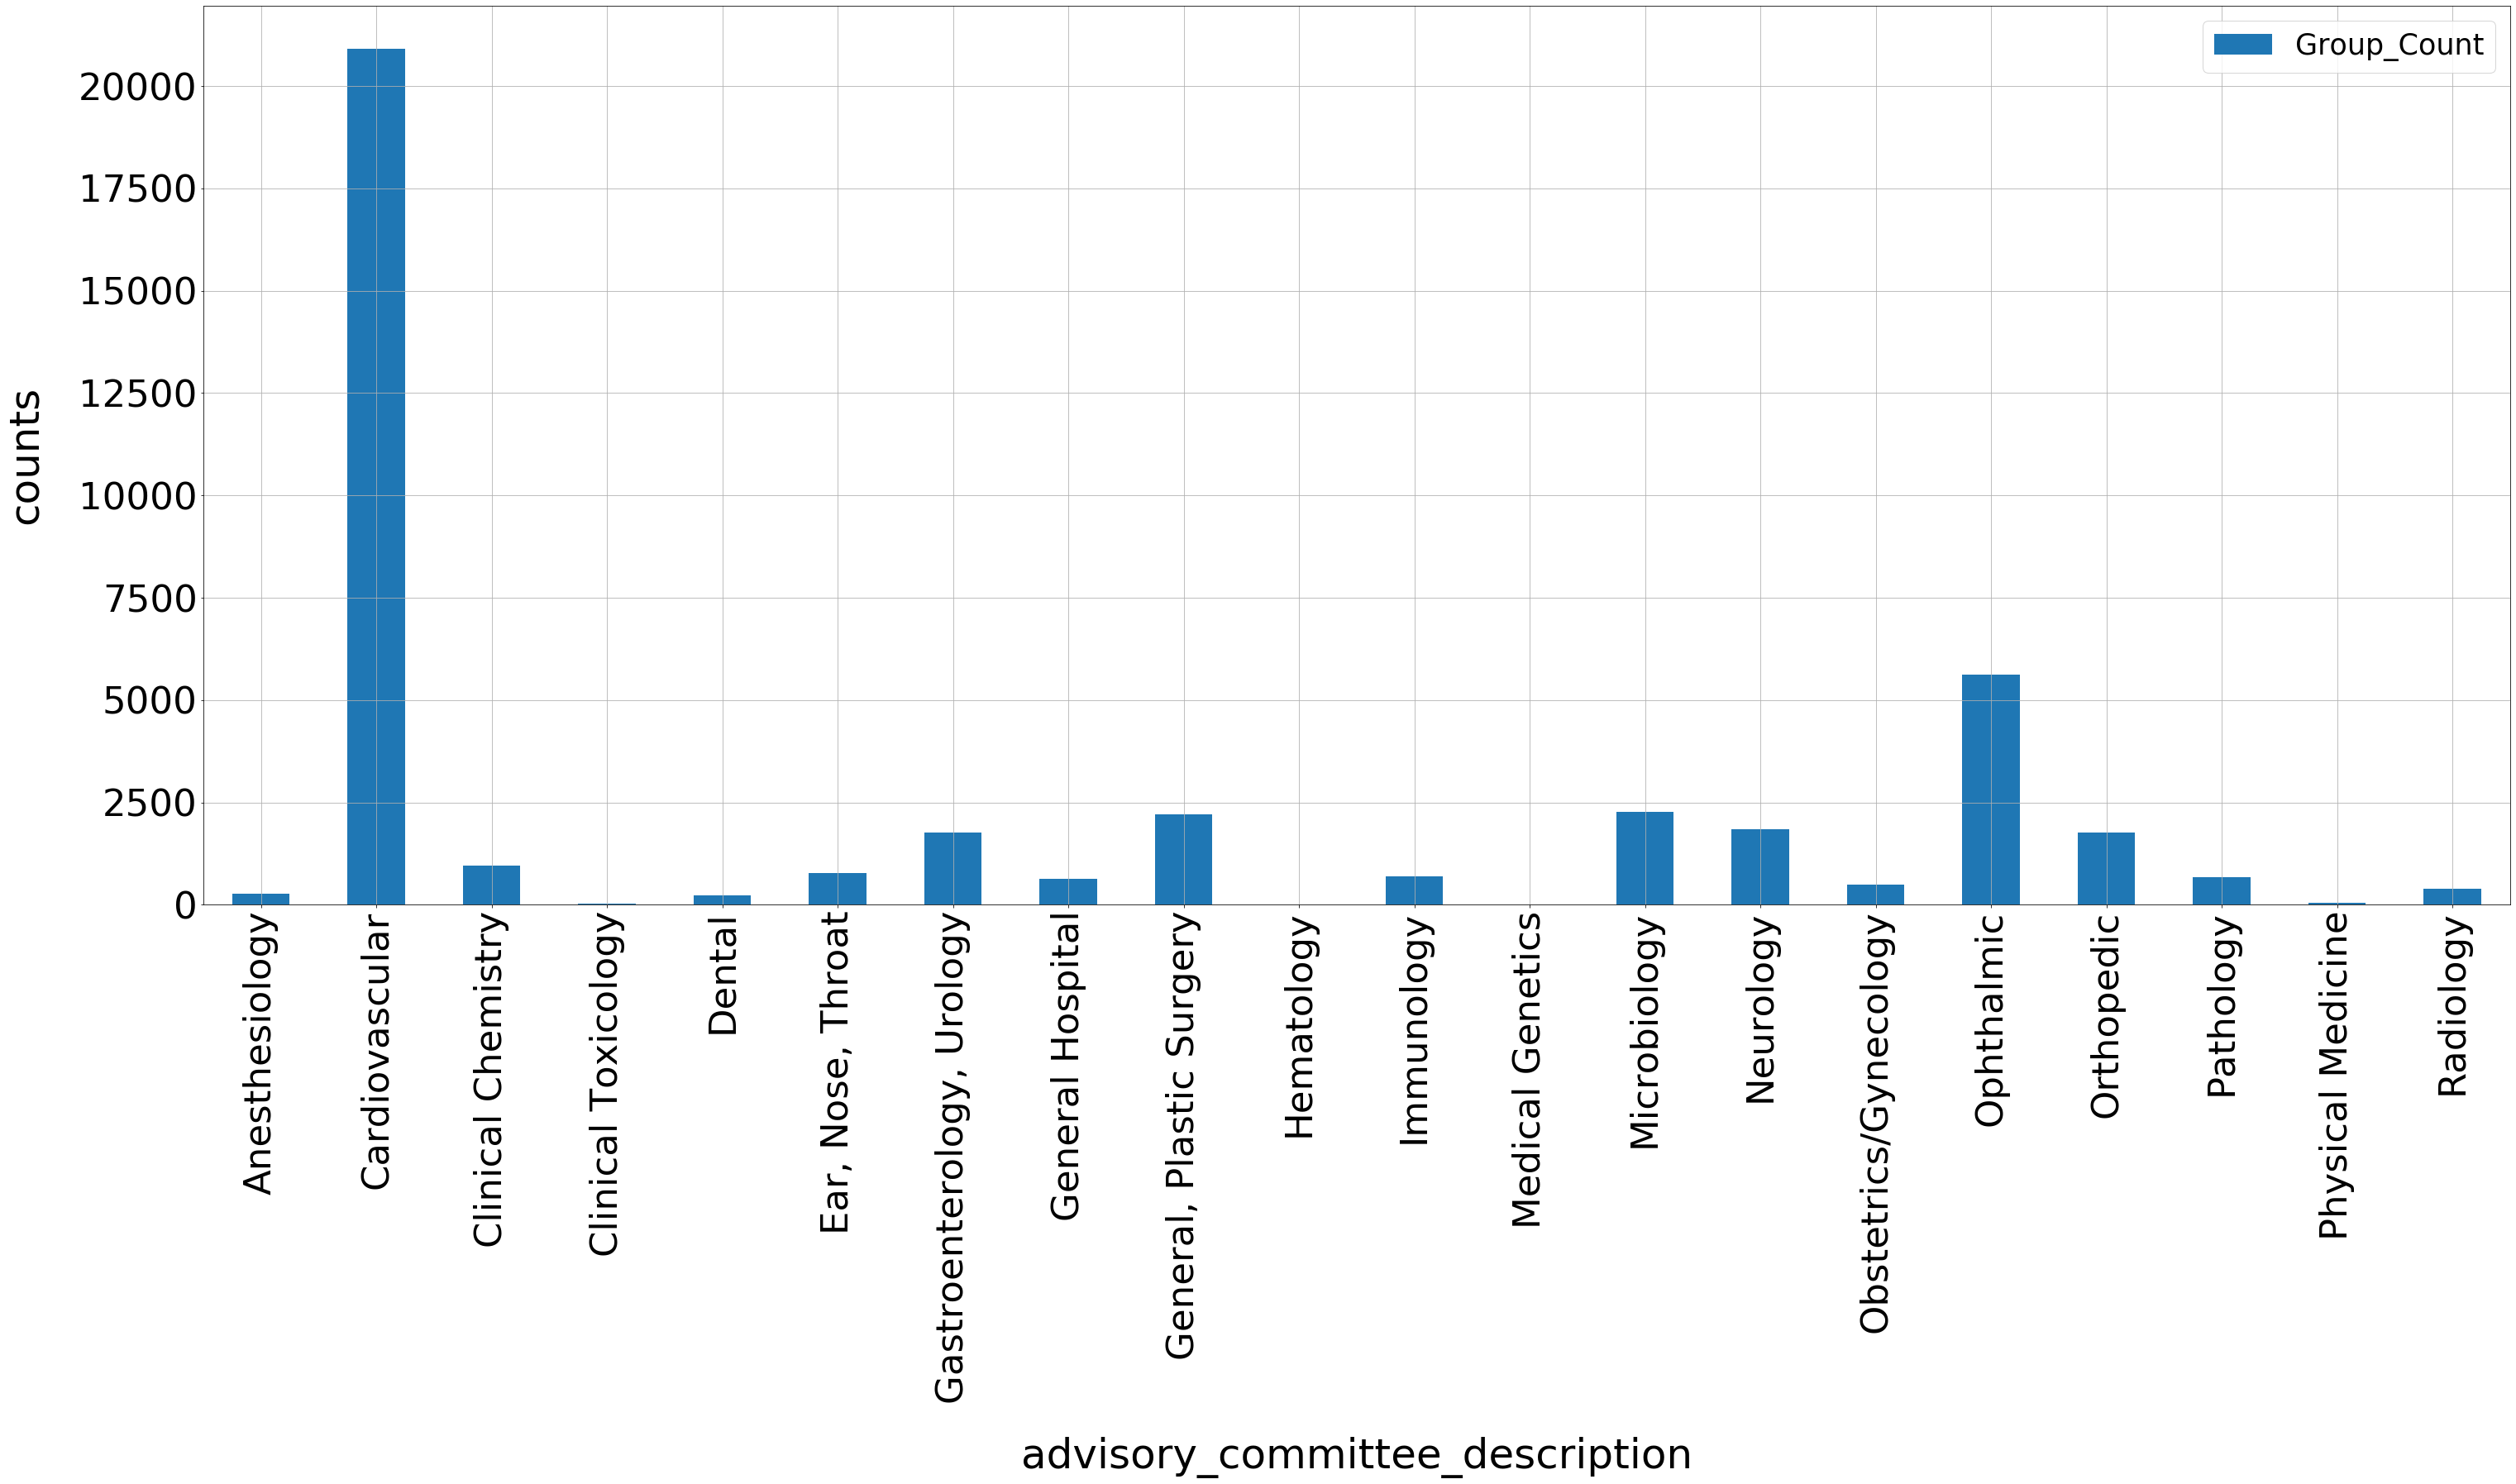

In [3]:
group_1 = df_pma.groupby(['advisory_committee_description'])
df_pma = pd.DataFrame(group_1.size().reset_index(name = "Group_Count"))
fig, ax = plt.subplots(figsize=(50,20))
plt.ylabel('counts', fontsize=50, labelpad=40)
plt.xlabel('advisory_committee_description', fontsize=50, labelpad=40)
ax.tick_params(axis="x", labelsize=45)
ax.tick_params(axis="y", labelsize=45)
df_pma.plot.bar(x='advisory_committee_description', y='Group_Count', ax=ax)
plt.legend(prop={'size':35}, loc="upper right")
plt.grid(True)

In [4]:
data_2 = json.load(open('device-classification-0001-of-0001.json'))
df_dc = pd.DataFrame(data_2['results'])
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 17 columns):
definition                       6550 non-null object
implant_flag                     6550 non-null object
review_code                      6550 non-null object
gmp_exempt_flag                  6550 non-null object
third_party_flag                 6550 non-null object
summarymalfunctionreporting      6550 non-null object
device_class                     6550 non-null object
openfda                          6550 non-null object
medical_specialty                6550 non-null object
device_name                      6550 non-null object
life_sustain_support_flag        6550 non-null object
regulation_number                6550 non-null object
review_panel                     6550 non-null object
submission_type_id               6550 non-null object
medical_specialty_description    6550 non-null object
product_code                     6550 non-null object
unclassified_reason          

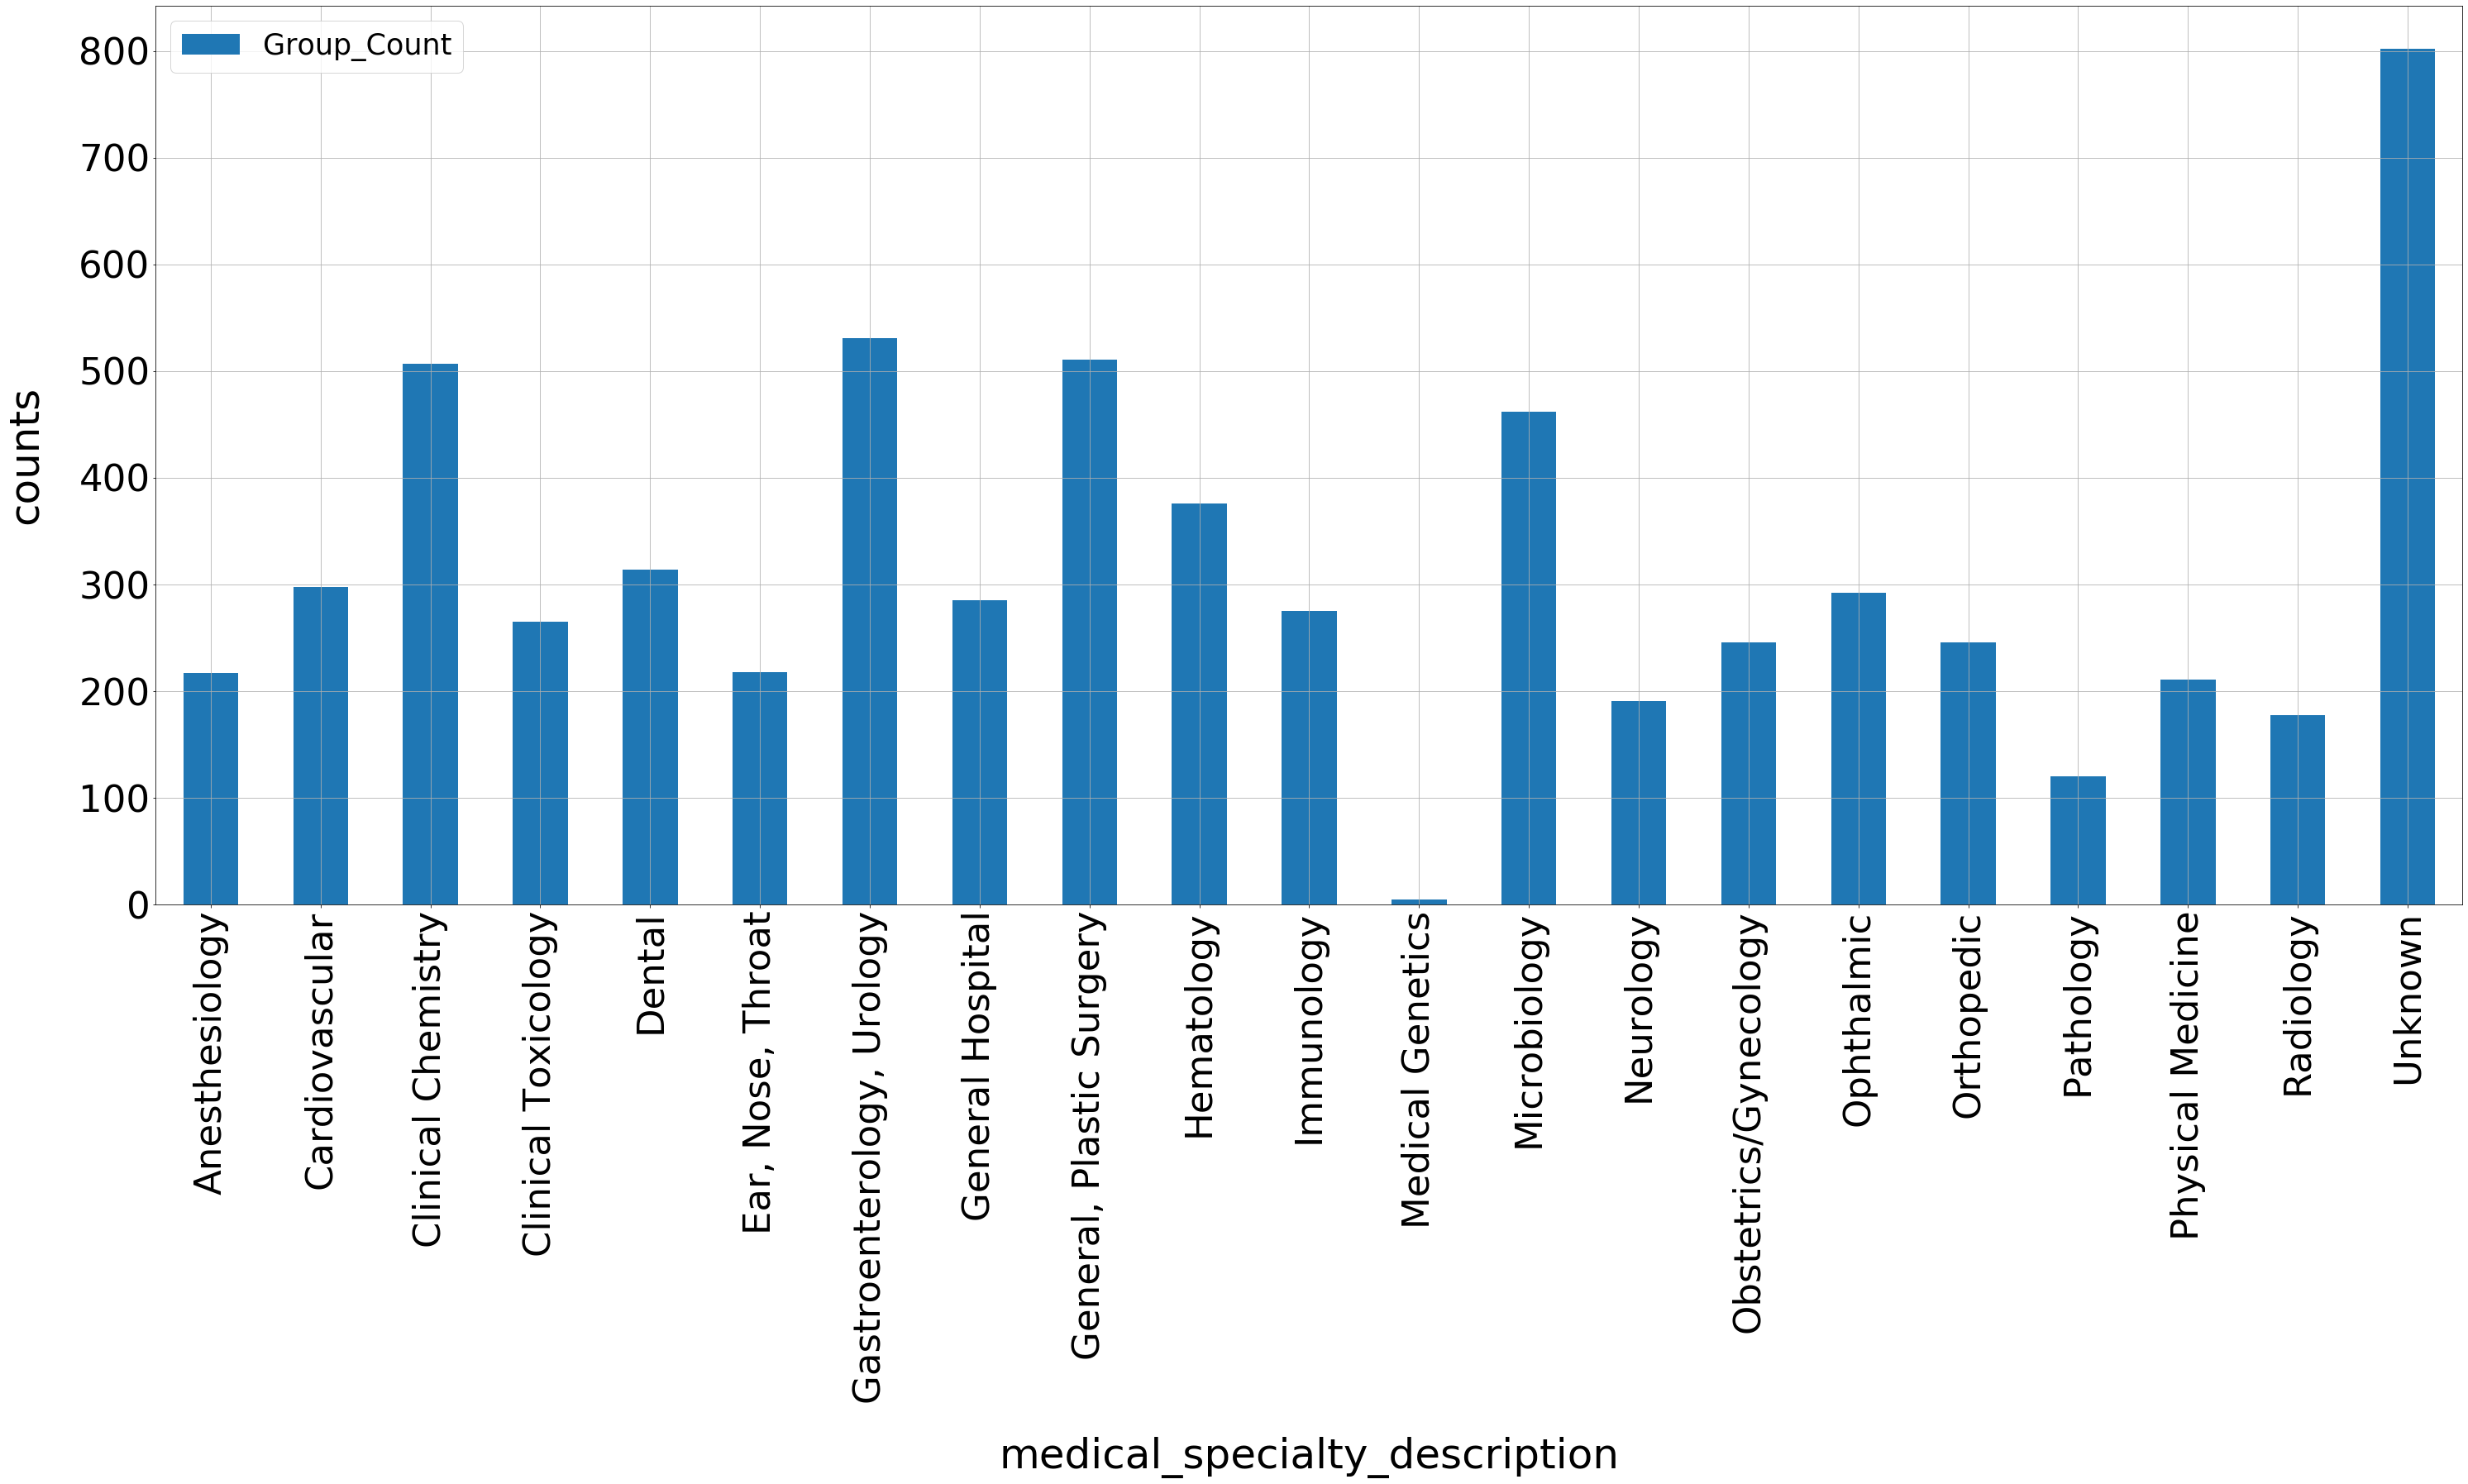

In [5]:
groups = df_dc.groupby(['medical_specialty_description'])
df_msd = pd.DataFrame(groups.size().reset_index(name = "Group_Count"))
fig, ax = plt.subplots(figsize=(50,20))
df_msd.plot.bar(x='medical_specialty_description', y='Group_Count', ax=ax)
plt.ylabel('counts', fontsize=50, labelpad=40)
plt.xlabel('medical_specialty_description', fontsize=50, labelpad=40)
ax.tick_params(axis="x", labelsize=45)
ax.tick_params(axis="y", labelsize=45)
plt.legend(prop={'size':35}, loc="upper left")
plt.grid(True)